In [62]:
%matplotlib notebook

In [42]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
#Import files
crime_data_to_load= "../Resources/crime-data-from-2010-to-present.csv"

crime_data_df=pd.read_csv(crime_data_to_load)

crime_data_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals..."
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals..."
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals..."
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False..."
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals..."


In [65]:
#Total number of unique area names
area_name_count=len(crime_data_df["Area Name"].unique())
area_name_count

21

In [66]:
#Total number of Crime Code Description
crime_count=len(crime_data_df["Crime Code Description"].unique())
crime_count

140

In [67]:
#Find the most common geographical area name in LA County
most_common_area=crime_data_df["Area Name"].value_counts()
most_common_area

77th Street    137513
Southwest      128111
N Hollywood    107707
Pacific        105655
Southeast      105104
Mission         98395
Northeast       94912
Van Nuys        94358
Newton          94123
Hollywood       92742
Topanga         92262
Devonshire      91347
Central         90489
Olympic         89634
Harbor          86972
West Valley     84521
Rampart         84241
West LA         83736
Wilshire        82575
Foothill        75348
Hollenbeck      73514
Name: Area Name, dtype: int64

In [84]:
#What area name has the least committed amount of crimes?
least_common_area=crime_data_df["Area Name"].value_counts(ascending=True)
least_common_area

Hollenbeck      73514
Foothill        75348
Wilshire        82575
West LA         83736
Rampart         84241
West Valley     84521
Harbor          86972
Olympic         89634
Central         90489
Devonshire      91347
Topanga         92262
Hollywood       92742
Newton          94123
Van Nuys        94358
Northeast       94912
Mission         98395
Southeast      105104
Pacific        105655
N Hollywood    107707
Southwest      128111
77th Street    137513
Name: Area Name, dtype: int64

In [ ]:
#crime_type=crime_data_df[crime_data_df['Crime Code']].groupby(['Area Name'])

In [68]:
#Find the highest amount of homicides by Area Name
homicide_count=crime_data_df[crime_data_df['Crime Code']==110].groupby(['Area Name'])['DR Number'].count()
sorted_homicide=homicide_count.sort_values(ascending=False)
sorted_homicide

Area Name
77th Street    422
Southeast      363
Newton         229
Southwest      212
Hollenbeck     157
Harbor         156
Rampart        139
Mission        128
Foothill       111
Central         98
Northeast       86
Olympic         79
N Hollywood     76
Hollywood       66
Van Nuys        58
Wilshire        55
West Valley     52
Pacific         48
Devonshire      39
Topanga         36
West LA         24
Name: DR Number, dtype: int64

In [69]:
crime_max=crime_data_df.groupby("Area Name")["Crime Code"].max()

merge_max=pd.merge(crime_data_df, crime_max, how="right", on=["Area Name", "Crime Code"])

In [ ]:
#Cleaning up the data
#crime_data=crime_data.dropna(how='any')
#crime_data.head()

In [77]:
#Diplay a data table of the mean, median, and SEM of crime offenders' age who committed homicide
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).mean()
median=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).median()
sem=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).sem()


summary_stat=pd.DataFrame({"Mean of Victim Age":mean,
                          "Median of Victim Age":median,
                          "Victim Age Std. Err":sem})
#colors=['blue', 'red', 'yellow']
#df_colors=[mean, median, sem]
#for i, df_colors in enumerate(df_colors):
    #df_colors.plot(kind="bar", x="Area Name", y="Victim Age", colors=colors[i])
    #plot.show()

<IPython.core.display.Javascript object>


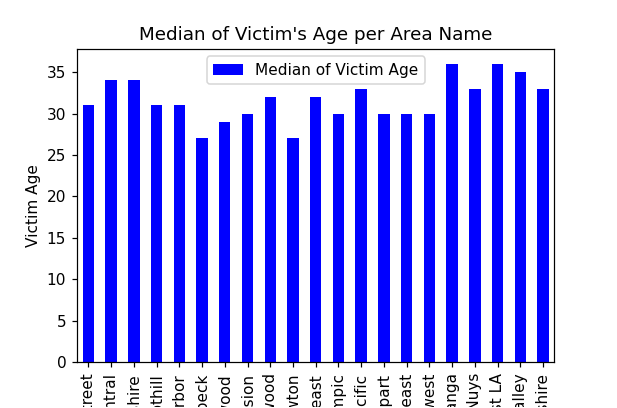

Text(0.5, 1.0, "Median of Victim's Age per Area Name")

In [80]:
#Display bar graph of the Median of Victim Age
median=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).median()
median_stat=pd.DataFrame({"Median of Victim Age":median})

plot_pandas=median_stat.plot.bar(color='b')
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.title("Median of Victim's Age per Area Name")

<IPython.core.display.Javascript object>


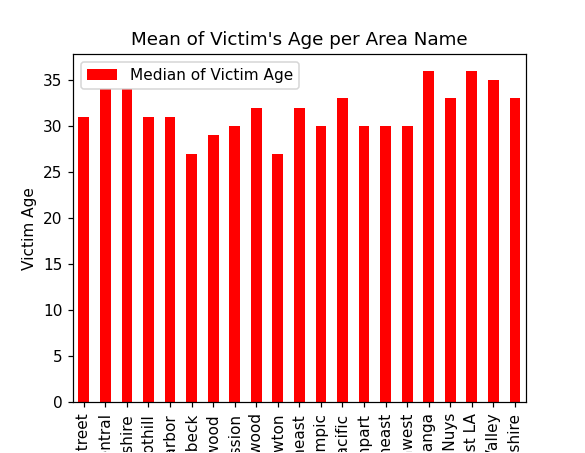

Text(0.5, 1.0, "Mean of Victim's Age per Area Name")

In [82]:
#Display bar graph of the Mean of Victim Age
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).mean()
mean_stat=pd.DataFrame({"Median of Victim Age":median})

plot_pandas=mean_stat.plot.bar(color='r')
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.title("Mean of Victim's Age per Area Name")

In [ ]:
#What are the most crimes being committed?

#What time of the day is this crime occurring the most?

#Provide a dataset of the crimes committed by men vs women 

In [ ]:
#What are the demographics of the arrested?

#Types of Crimes - Average(s) for age, race, bell curve on which race commits is targeted the most/least. 

#Use line charts to the 3 highest races in relation to crimes being committed

In [ ]:
#What type of crime is least committed per area compared to the other neighborhoods?

#What geographical area has the least amount of crimes? 